In [256]:
from sklearn.datasets import* 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
%matplotlib inline
import math
from mpl_toolkits.mplot3d import Axes3D

In [257]:
df=pd.read_csv('diabetes.csv'  )

In [258]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [259]:
names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [260]:
df.shape

(768, 9)

In [261]:
df.head(768)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [262]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [263]:
#descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [264]:
#class distribution
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [265]:
#correlation blw attributes
df.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [266]:
#preprocessing

In [267]:
 
#min max scaling
#minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
#tf1=minmax.fit(df).transform(df)
tf1=preprocessing.MinMaxScaler().fit(df).transform(df)
print(tf1)




[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]


C:\Users\sai krishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [268]:
#standard scaler
#standard=preprocessing.StandardScaler()
#tf2=standard.fit(df).transform(df)
tf2=preprocessing.StandardScaler().fit(df).transform(df)
print(tf2)

[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
   1.36589591]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
  -0.73212021]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
   1.36589591]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
  -0.73212021]]


C:\Users\sai krishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sai krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [269]:
#binarizer
tf3=preprocessing.Binarizer().fit(df).transform(df)
print(tf3)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [270]:
#normalizer
tf4=preprocessing.Normalizer().fit(df).transform(df)
print(tf4)

[[0.03355185 0.82761219 0.40262215 ... 0.00350617 0.27959871 0.00559197]
 [0.008424   0.71604034 0.55598426 ... 0.00295683 0.26114412 0.        ]
 [0.04039717 0.9240852  0.32317734 ... 0.00339336 0.16158867 0.00504965]
 ...
 [0.02691539 0.65135243 0.38758161 ... 0.00131885 0.16149234 0.        ]
 [0.00665291 0.83826692 0.39917472 ... 0.00232187 0.31268687 0.00665291]
 [0.00791454 0.73605211 0.55401772 ... 0.00249308 0.18203439 0.        ]]


In [271]:
df1=pd.DataFrame(tf1)
df1.columns=df.columns

In [272]:
df1.head(768)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1.0
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.0
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1.0
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,1.0


C:\Users\sai krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\sai krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


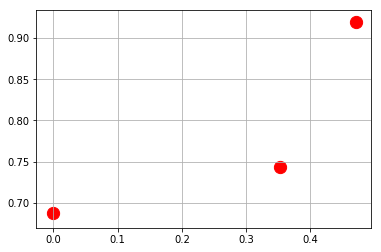

In [273]:
for i in range(6):
    if(df1.ix[i]['Outcome']==1.0):
        #plt.scatter(df1.ix[i]['Pregnancies'],df1.ix[i]['Glucose'],df1.ix[i]['BloodPressure'],df1.ix[i]['SkinThickness'],df1.ix[i]['Insulin'],df1.ix[i]['BMI'],df1.ix[i]['DiabetesPedigreeFunction'],df1.ix[i]['Age'],s=150,c='r')
        #else:
         #   plt.scatter(df1.ix[i]['Pregnancies'],df1.ix[i]['Glucose'],df1.ix[i]['BloodPressure'],df1.ix[i]['SkinThickness'],df1.ix[i]['Insulin'],df1.ix[i]['BMI'],df1.ix[i]['DiabetesPedigreeFunction'],df1.ix[i]['Age'],s=150,c='b')
        plt.scatter(df1.ix[i]['Pregnancies'],df1.ix[i]['Glucose'],s=150,c='r')    
plt.grid()
plt.show()
    

In [274]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [275]:
data=df1.drop('Outcome',1)
data.drop('Pregnancies',1)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
5,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000
6,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333
7,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333
8,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333
9,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000


In [276]:
# train_x=data[:400]
# train_y=df1['Outcome'][:400]

In [277]:
# KNN=KNeighborsClassifier(10)
# KNN.fit(train_x,train_y)

In [278]:
# test=np.array(data[400:768])
# print(test)

In [279]:
# test1=test.reshape(368,-1)

In [280]:
# KNN.predict(test1)

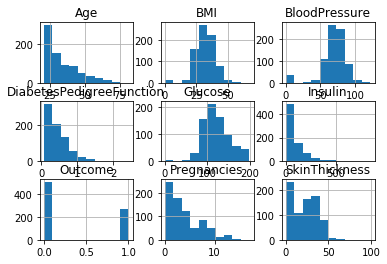

In [281]:
#histogram
df.hist()
plt.show()

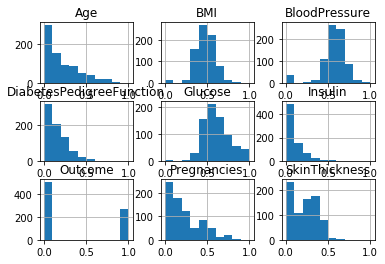

In [282]:
df1.hist()
plt.show()

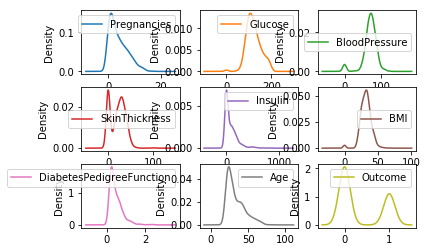

In [283]:
#density plot
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.show()

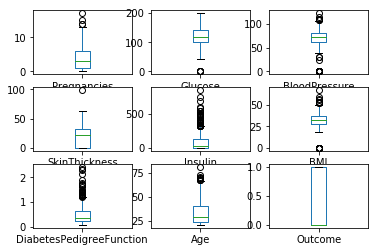

In [284]:
#box and whiskers
df.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

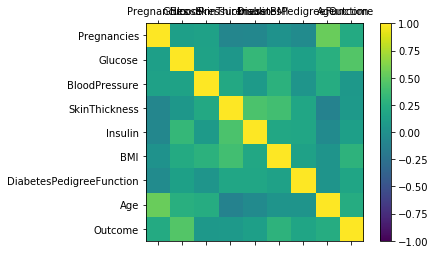

In [285]:
correlations=df1.corr()
import numpy
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()



In [286]:
# from sklearn.metrics import accuracy_score

# knn = KNeighborsClassifier(n_neighbors=10)
# clf_ = knn.fit(train_x,train_y)
# y_test=df1['Outcome'][400:768]
# y_pred = clf_.predict(test1)
# print('Accuracy is {}'.format(accuracy_score(y_test,y_pred )))

In [287]:
from sklearn.cluster import KMeans

In [288]:
clus=KMeans(n_clusters=2,max_iter=1000)
data.drop(['Pregnancies','SkinThickness'],1)

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.590164,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.347243,0.253629,0.183333
3,0.447236,0.540984,0.111111,0.418778,0.038002,0.000000
4,0.688442,0.327869,0.198582,0.642325,0.943638,0.200000
5,0.582915,0.606557,0.000000,0.381520,0.052519,0.150000
6,0.391960,0.409836,0.104019,0.461997,0.072588,0.083333
7,0.577889,0.000000,0.000000,0.526080,0.023911,0.133333
8,0.989950,0.573770,0.641844,0.454545,0.034159,0.533333
9,0.628141,0.786885,0.000000,0.000000,0.065756,0.550000


In [289]:
clus.fit(data)
clus.labels_

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [290]:
df1['clus predicted']=clus.labels_

#data.drop('SkinThickness',1)

In [291]:
train_x=data[:400]
train_y=df1['clus predicted'][:400]
# test=data[400:768]
# test1=test.reshape(368,-1)
# KNN=KNeighborsClassifier(20)
# KNN.fit(train_x,train_y)
# test=np.array(data[400:768])
# test1=test.reshape(368,-1)
# KNN.predict(test1)

In [292]:
test=np.array(data[400:768])

In [293]:
test1=test.reshape(368,-1)

In [300]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=20)
kclf_ = knn.fit(train_x,train_y)
y_test=df1['clus predicted'][400:768]
y_pred = kclf_.predict(test1)
print('Accuracy is {}'.format(accuracy_score(y_test,y_pred )))

Accuracy is 0.9592391304347826


In [301]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='linear', gamma=1) 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
clf=model.fit(train_x,train_y)
model.score(train_x,train_y)
#Predict Output
predicted= model.predict(test1)

y_test=df1['clus predicted'][400:768]
print('Accuracy is {}'.format(accuracy_score(y_test,predicted )))

Accuracy is 0.9782608695652174


In [298]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lclf = LinearDiscriminantAnalysis()
lclf.fit(train_x,train_y)
pr=lclf.predict(test1)
print('Accuracy is {}'.format(accuracy_score(y_test,pr)))


Accuracy is 0.9728260869565217
